In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt



In [2]:
# Load the Excel file of tickers
file_path = '/Users/pranavsharma/Downloads/Yahoo Ticker Symbols - September 2017.xlsx'
df = pd.read_excel(file_path)
usa_rows = df[df['Unnamed: 4'] == 'USA']
tickers = usa_rows.iloc[:, 0].tolist()

ticker_lst= ['NVDA','AAPL', 'MSFT', 'AMZN', 'GOOG', 'META', 'TSLA', 'BRK-B', 'AVGO', 'WMT', 'LLY', 'JPM', 'V', 'UNH', 'XOM', 'ORCL', 'MA', 'COST', 'HD', 'PG', 'NFLX' ]

# Linear Regression Model

In [1]:
ticker_id=[]
ND_price=[]
PD_price= []
EPS= []
RMSE= []

for i in ticker_lst:
    ticker_id.append(i)
    stock_data= yf.download(i, start="2024-10-6", end="2024-11-20")
    closing= stock_data['Close'][i].tolist()

    working_df= pd.DataFrame(columns=['Close'])
    working_df['Close']= closing
    # Create lag features
    working_df['Lag_1'] = working_df['Close'].shift(1)  # Previous day's close
    working_df['Lag_2'] = working_df['Close'].shift(2)  # 2 days ago
    working_df['Lag_3'] = working_df['Close'].shift(3)  # 3 days ago

    # Drop rows with NaN values caused by the lag
    working_df = working_df.dropna()

    X = working_df[['Lag_1', 'Lag_2', 'Lag_3']]  # Features
    y = working_df['Close']  # Target variable
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    # Train the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Evaluate
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    print("Root Mean Squared Error:", rmse)

    # Train the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Evaluate
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    RMSE.append(rmse)
    
    # Prepare the last row of lagged features
    last_row = working_df.iloc[-1][['Lag_1', 'Lag_2', 'Lag_3']].values.reshape(1, -1)

    # Predict the next day's closing price
    next_day_price = model.predict(last_row)
    ND_price.append(next_day_price[0])
    #print("Predicted Next Day Price:", next_day_price[0])
    EPS.append(next_day_price - closing[-1])
    PD_price.append(closing[-1])




NameError: name 'ticker_lst' is not defined

In [ ]:
analysis_df= pd.DataFrame()
analysis_df['ticker_id']= ticker_id
analysis_df['ND_Predictions']=ND_price
analysis_df['PD_price']=PD_price
analysis_df['EPS']= EPS
analysis_df['RMSE']= RMSE


In [ ]:
analysis_df

,ticker_id,ND_Predictions,PD_price,EPS,RMSE
0,NVDA,139.070303,147.009995,[-7.939691157716624],4.176227
1,AAPL,229.943609,228.279999,[1.663610121379719],2.739078
2,MSFT,416.998601,417.790009,[-0.7914071876763273],4.564206
3,AMZN,204.630460,204.610001,[0.020459513114104766],5.695086
4,GOOG,179.696753,179.580002,[0.11675097935864187],3.482673
5,META,565.862931,561.090027,[4.7729037529039715],10.500131
6,TSLA,354.031549,346.000000,[8.031549114468078],21.053204
7,BRK-B,467.107251,468.859985,[-1.7527348458533538],4.235288
8,AVGO,170.624378,165.350006,[5.274371747801666],4.036959
9,WMT,84.208978,86.599998,[-2.3910200843735367],1.120242


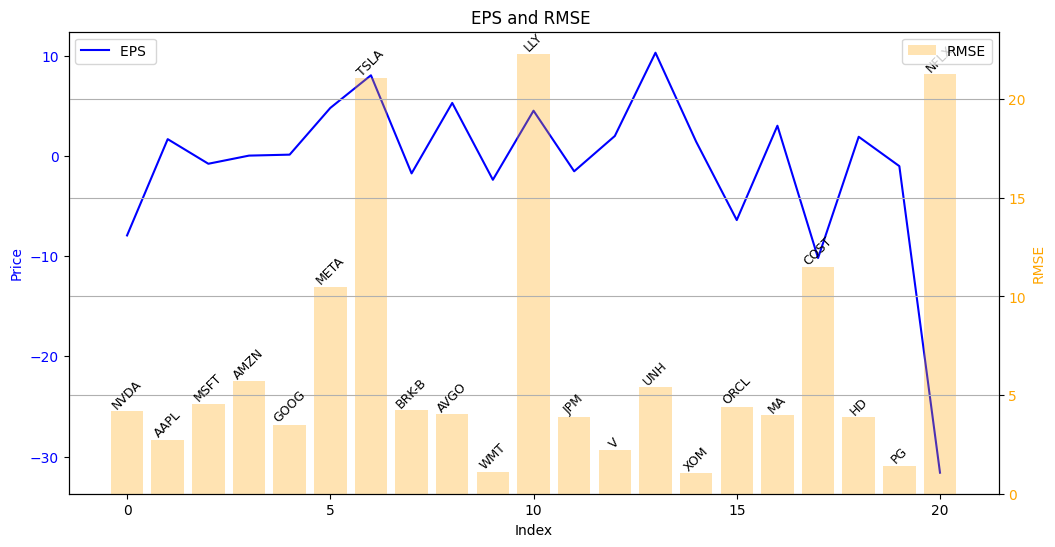

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Line plot for prices
# ax1.plot(analysis_df.index, analysis_df['PD_price'], label='Actual Price', color='blue')
# ax1.plot(analysis_df.index, analysis_df['ND_Predictions'], label='Predicted Price', color='green', linestyle='--')
ax1.plot(analysis_df.index, analysis_df['EPS'], label='EPS ', color='blue')
ax1.set_xlabel('Index')
ax1.set_ylabel('Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')

# Bar plot for RMSE
ax2 = ax1.twinx()
bars = ax2.bar(analysis_df.index, analysis_df['RMSE'], alpha=0.3, label='RMSE', color='orange')
ax2.set_ylabel('RMSE', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')
ax2.legend(loc='upper right')

# Add TickerID labels on top of bars
for bar, ticker_id in zip(bars, analysis_df['ticker_id']):
    ax2.text(
        bar.get_x() + bar.get_width() / 2,  # X-coordinate (center of the bar)
        bar.get_height(),                  # Y-coordinate (top of the bar)
        ticker_id,                         # TickerID to display
        ha='center', va='bottom', fontsize=9, rotation=45, color='black'
    )

plt.title('EPS and RMSE ')
plt.grid()
plt.show()


In [ ]:
analysis_df

,ticker_id,ND_Predictions,PD_price,EPS,RMSE
0,NVDA,141.930263,136.020004,[5.910258231811127],3.997196
1,AAPL,230.336161,232.869995,[-2.533833692123494],2.688838
2,MSFT,419.447780,418.790009,[0.6577711100059673],4.241778
3,AMZN,200.049872,201.449997,[-1.4001245095134323],6.173560
4,GOOG,168.916708,169.429993,[-0.5132842263525959],3.416303
5,META,571.154368,565.109985,[6.044383050197325],13.072712
6,TSLA,346.185548,338.589996,[7.595552091293939],14.805429
7,BRK-B,471.216121,477.429993,[-6.213871580130899],5.063052
8,AVGO,170.166202,164.820007,[5.346194944251721],5.449303
9,WMT,89.540440,89.500000,[0.04044046276352731],1.552482


# ANN model

In [26]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [27]:

# Load and preprocess the data
#data = pd.read_csv('stock_prices.csv')  # Replace with your file
data = yf.download('AVGO', start="2024-06-20", end="2024-11-20")
closing_prices = data['Close']['AVGO'].values.reshape(-1, 1)

ticker_id=[]
NextDayPrediction=[]
PreviousDayPrice= []
EPS= []
RMSE= []

for i in ticker_lst:
    ticker_id.append(i)
    data = yf.download(i, start="2024-06-20", end="2024-11-21")
    closing_prices = data['Close'][i].values.reshape(-1, 1)

    # Normalize the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_prices = scaler.fit_transform(closing_prices)

    # Create features and labels
    def create_dataset(data, window_size):
        X, y = [], []
        for i in range(len(data) - window_size):
            X.append(data[i:i + window_size])
            y.append(data[i + window_size])
        return np.array(X), np.array(y)

    window_size = 90  # Use the past 10 days to predict the next day
    X, y = create_dataset(scaled_prices, window_size)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Build the ANN model
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(32, activation='relu'),
        Dense(1)  # Output layer for predicting next day price
    ])

    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

    # Predict the next day's price
    last_days = scaled_prices[-window_size:].reshape(1, -1)
    predicted_price_scaled = model.predict(last_days)
    predicted_price = scaler.inverse_transform(predicted_price_scaled)
    
    NextDayPrediction.append(predicted_price[0][0])
    pd_price= closing_prices[-1][0]
    PreviousDayPrice.append(pd_price)
    EPS.append(NextDayPrediction-pd_price)

    #print(f"Predicted next day's price: {predicted_price[0][0]}")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Epoch 1/50



/Users/pranavsharma/Desktop/VS/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step - loss: 1.7950 - mae: 1.3362 - val_loss: 1.5629 - val_mae: 1.2433
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 1.3318 - mae: 1.1506 - val_loss: 1.1286 - val_mae: 1.0530
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.9659 - mae: 0.9790 - val_loss: 0.7842 - val_mae: 0.8735
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.6755 - mae: 0.8160 - val_loss: 0.5324 - val_mae: 0.7174
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.4674 - mae: 0.6761 - val_loss: 0.3549 - val_mae: 0.5832
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3294 - mae: 0.5652 - val_loss: 0.2557 - val_mae: 0.4905
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2311 - mae: 0.4711 - val_loss: 0.1766 - val_mae: 0.4010
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1554 - mae: 0.3840 - val_loss: 0.1180 - val_mae: 0.3216
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0979 - mae: 0.3020 - val_loss: 

[*********************100%***********************]  1 of 1 completed

Epoch 1/50



/Users/pranavsharma/Desktop/VS/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step - loss: 1.0599 - mae: 1.0210 - val_loss: 0.8858 - val_mae: 0.9264
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.6832 - mae: 0.8153 - val_loss: 0.6054 - val_mae: 0.7532
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.4132 - mae: 0.6272 - val_loss: 0.3910 - val_mae: 0.5918
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2417 - mae: 0.4697 - val_loss: 0.2423 - val_mae: 0.4350
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1200 - mae: 0.3134 - val_loss: 0.1506 - val_mae: 0.2911
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0435 - mae: 0.1757 - val_loss: 0.0988 - val_mae: 0.2654
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0172 - mae: 0.1164 - val_loss: 0.0761 - val_mae: 0.2682
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0299 - mae: 0.1367 - val_loss: 0.0722 - val_mae: 0.2675
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0586 - mae: 0.2081 - val_loss: 

[*********************100%***********************]  1 of 1 completed

Epoch 1/50



/Users/pranavsharma/Desktop/VS/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step - loss: 0.0944 - mae: 0.2849 - val_loss: 0.0885 - val_mae: 0.2554
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0342 - mae: 0.1510 - val_loss: 0.0389 - val_mae: 0.1807
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0118 - mae: 0.0844 - val_loss: 0.0163 - val_mae: 0.1170
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0125 - mae: 0.0885 - val_loss: 0.0139 - val_mae: 0.0969
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0210 - mae: 0.1260 - val_loss: 0.0145 - val_mae: 0.0994
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0239 - mae: 0.1382 - val_loss: 0.0148 - val_mae: 0.1006
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0220 - mae: 0.1311 - val_loss: 0.0153 - val_mae: 0.1005
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0174 - mae: 0.1112 - val_loss: 0.0177 - val_mae: 0.1177
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0130 - mae: 0.0925 - val_loss: 

[*********************100%***********************]  1 of 1 completed

Epoch 1/50



/Users/pranavsharma/Desktop/VS/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step - loss: 1.0934 - mae: 1.0379 - val_loss: 0.4998 - val_mae: 0.6873
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.6877 - mae: 0.8215 - val_loss: 0.2743 - val_mae: 0.4996
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.4051 - mae: 0.6266 - val_loss: 0.1185 - val_mae: 0.3117
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2032 - mae: 0.4372 - val_loss: 0.0411 - val_mae: 0.1400
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0785 - mae: 0.2584 - val_loss: 0.0221 - val_mae: 0.1344
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0204 - mae: 0.1255 - val_loss: 0.0521 - val_mae: 0.2099
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0151 - mae: 0.0959 - val_loss: 0.1085 - val_mae: 0.2948
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0446 - mae: 0.1825 - val_loss: 0.1649 - val_mae: 0.3794
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0824 - mae: 0.2672 - val_loss: 

[*********************100%***********************]  1 of 1 completed

Epoch 1/50



/Users/pranavsharma/Desktop/VS/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step - loss: 0.2645 - mae: 0.5076 - val_loss: 0.1146 - val_mae: 0.3259
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1430 - mae: 0.3684 - val_loss: 0.0481 - val_mae: 0.2004
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0607 - mae: 0.2311 - val_loss: 0.0143 - val_mae: 0.0869
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0172 - mae: 0.1113 - val_loss: 0.0086 - val_mae: 0.0832
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0071 - mae: 0.0706 - val_loss: 0.0205 - val_mae: 0.1242
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0180 - mae: 0.1136 - val_loss: 0.0347 - val_mae: 0.1678
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0337 - mae: 0.1643 - val_loss: 0.0412 - val_mae: 0.1878
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0420 - mae: 0.1876 - val_loss: 0.0396 - val_mae: 0.1842
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0412 - mae: 0.1854 - val_loss: 

[*********************100%***********************]  1 of 1 completed

Epoch 1/50



/Users/pranavsharma/Desktop/VS/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step - loss: 1.3982 - mae: 1.1787 - val_loss: 0.9760 - val_mae: 0.9843
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.8824 - mae: 0.9349 - val_loss: 0.5812 - val_mae: 0.7566
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.5083 - mae: 0.7078 - val_loss: 0.3039 - val_mae: 0.5414
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2568 - mae: 0.4996 - val_loss: 0.1258 - val_mae: 0.3392
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0986 - mae: 0.3025 - val_loss: 0.0366 - val_mae: 0.1592
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0213 - mae: 0.1213 - val_loss: 0.0135 - val_mae: 0.0940
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0067 - mae: 0.0703 - val_loss: 0.0290 - val_mae: 0.1317
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0275 - mae: 0.1489 - val_loss: 0.0564 - val_mae: 0.2107
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0603 - mae: 0.2349 - val_loss: 

[*********************100%***********************]  1 of 1 completed

Epoch 1/50



/Users/pranavsharma/Desktop/VS/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step - loss: 0.2507 - mae: 0.4427 - val_loss: 0.0270 - val_mae: 0.1275
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1536 - mae: 0.3278 - val_loss: 0.0128 - val_mae: 0.0898
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0851 - mae: 0.2642 - val_loss: 0.0243 - val_mae: 0.1364
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0484 - mae: 0.2047 - val_loss: 0.0508 - val_mae: 0.2048
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0378 - mae: 0.1566 - val_loss: 0.0756 - val_mae: 0.2609
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0434 - mae: 0.1556 - val_loss: 0.0871 - val_mae: 0.2839
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0514 - mae: 0.1819 - val_loss: 0.0822 - val_mae: 0.2762
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0525 - mae: 0.1947 - val_loss: 0.0654 - val_mae: 0.2449
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0449 - mae: 0.1836 - val_loss: 

[*********************100%***********************]  1 of 1 completed

Epoch 1/50



/Users/pranavsharma/Desktop/VS/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step - loss: 0.2203 - mae: 0.4470 - val_loss: 0.0043 - val_mae: 0.0627
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0252 - mae: 0.1178 - val_loss: 0.0442 - val_mae: 0.1990
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0412 - mae: 0.1816 - val_loss: 0.0886 - val_mae: 0.2872
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0881 - mae: 0.2779 - val_loss: 0.0745 - val_mae: 0.2616
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0736 - mae: 0.2512 - val_loss: 0.0360 - val_mae: 0.1761
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0351 - mae: 0.1701 - val_loss: 0.0084 - val_mae: 0.0669
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0117 - mae: 0.0942 - val_loss: 0.0050 - val_mae: 0.0691
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0158 - mae: 0.0904 - val_loss: 0.0157 - val_mae: 0.1108
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0335 - mae: 0.1534 - val_loss: 

[*********************100%***********************]  1 of 1 completed

Epoch 1/50



/Users/pranavsharma/Desktop/VS/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step - loss: 0.4079 - mae: 0.5877 - val_loss: 0.1875 - val_mae: 0.3791
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2120 - mae: 0.3837 - val_loss: 0.0821 - val_mae: 0.1912
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0996 - mae: 0.2488 - val_loss: 0.0504 - val_mae: 0.1846
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0557 - mae: 0.2157 - val_loss: 0.0622 - val_mae: 0.2431
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0594 - mae: 0.2068 - val_loss: 0.0708 - val_mae: 0.2528
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0667 - mae: 0.2140 - val_loss: 0.0610 - val_mae: 0.2318
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0572 - mae: 0.2013 - val_loss: 0.0448 - val_mae: 0.1987
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0378 - mae: 0.1633 - val_loss: 0.0307 - val_mae: 0.1561
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0218 - mae: 0.1287 - val_loss: 

[*********************100%***********************]  1 of 1 completed

Epoch 1/50



/Users/pranavsharma/Desktop/VS/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step - loss: 0.5967 - mae: 0.7709 - val_loss: 0.3524 - val_mae: 0.5926
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.3362 - mae: 0.5784 - val_loss: 0.1769 - val_mae: 0.4180
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1566 - mae: 0.3934 - val_loss: 0.0704 - val_mae: 0.2578
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0483 - mae: 0.2140 - val_loss: 0.0174 - val_mae: 0.1082
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0054 - mae: 0.0651 - val_loss: 0.0085 - val_mae: 0.0790
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0167 - mae: 0.1092 - val_loss: 0.0267 - val_mae: 0.1352
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0566 - mae: 0.2252 - val_loss: 0.0473 - val_mae: 0.1942
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0928 - mae: 0.2937 - val_loss: 0.0558 - val_mae: 0.2157
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1081 - mae: 0.3182 - val_loss: 

[*********************100%***********************]  1 of 1 completed

Epoch 1/50



/Users/pranavsharma/Desktop/VS/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step - loss: 0.5859 - mae: 0.7285 - val_loss: 0.6440 - val_mae: 0.7401
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2244 - mae: 0.4087 - val_loss: 0.3280 - val_mae: 0.4597
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0693 - mae: 0.2317 - val_loss: 0.1805 - val_mae: 0.3611
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0705 - mae: 0.2184 - val_loss: 0.1402 - val_mae: 0.3690
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1304 - mae: 0.2995 - val_loss: 0.1347 - val_mae: 0.3632
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1627 - mae: 0.3535 - val_loss: 0.1292 - val_mae: 0.3537
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1503 - mae: 0.3449 - val_loss: 0.1204 - val_mae: 0.3443
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1112 - mae: 0.2901 - val_loss: 0.1167 - val_mae: 0.3370
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0672 - mae: 0.2144 - val_loss: 

[*********************100%***********************]  1 of 1 completed

Epoch 1/50



/Users/pranavsharma/Desktop/VS/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step - loss: 1.4738 - mae: 1.1950 - val_loss: 0.7017 - val_mae: 0.8268
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 1.1569 - mae: 1.0557 - val_loss: 0.5043 - val_mae: 0.6974
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.8717 - mae: 0.9125 - val_loss: 0.3406 - val_mae: 0.5684
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.6282 - mae: 0.7700 - val_loss: 0.2142 - val_mae: 0.4441
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.4366 - mae: 0.6362 - val_loss: 0.1237 - val_mae: 0.3272
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2869 - mae: 0.5077 - val_loss: 0.0622 - val_mae: 0.2159
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1706 - mae: 0.3788 - val_loss: 0.0264 - val_mae: 0.1277
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0877 - mae: 0.2508 - val_loss: 0.0148 - val_mae: 0.0971
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0380 - mae: 0.1638 - val_loss: 

[*********************100%***********************]  1 of 1 completed

Epoch 1/50



/Users/pranavsharma/Desktop/VS/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 841ms/step - loss: 2.0361 - mae: 1.4135 - val_loss: 0.9737 - val_mae: 0.9602
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 1.6160 - mae: 1.2591 - val_loss: 0.7388 - val_mae: 0.8290
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 1.2609 - mae: 1.1112 - val_loss: 0.5236 - val_mae: 0.6889
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.9521 - mae: 0.9636 - val_loss: 0.3483 - val_mae: 0.5531
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.6865 - mae: 0.8164 - val_loss: 0.2134 - val_mae: 0.4205
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.4605 - mae: 0.6663 - val_loss: 0.1162 - val_mae: 0.2897
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2789 - mae: 0.5160 - val_loss: 0.0561 - val_mae: 0.1843
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1458 - mae: 0.3697 - val_loss: 0.0286 - val_mae: 0.1618
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0601 - mae: 0.2308 - val_loss: 

[*********************100%***********************]  1 of 1 completed

Epoch 1/50



/Users/pranavsharma/Desktop/VS/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 527ms/step - loss: 0.6902 - mae: 0.8230 - val_loss: 0.2397 - val_mae: 0.4835
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3251 - mae: 0.5618 - val_loss: 0.0763 - val_mae: 0.2654
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1122 - mae: 0.3208 - val_loss: 0.0156 - val_mae: 0.0972
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0290 - mae: 0.1432 - val_loss: 0.0089 - val_mae: 0.0848
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0097 - mae: 0.0822 - val_loss: 0.0388 - val_mae: 0.1825
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0333 - mae: 0.1617 - val_loss: 0.0754 - val_mae: 0.2655
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0696 - mae: 0.2484 - val_loss: 0.0983 - val_mae: 0.3057
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0931 - mae: 0.2921 - val_loss: 0.1014 - val_mae: 0.3107
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0954 - mae: 0.2959 - val_loss: 

[*********************100%***********************]  1 of 1 completed

Epoch 1/50



/Users/pranavsharma/Desktop/VS/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step - loss: 1.6810 - mae: 1.2836 - val_loss: 1.1156 - val_mae: 1.0487
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 1.2152 - mae: 1.0902 - val_loss: 0.8010 - val_mae: 0.8863
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.8176 - mae: 0.8922 - val_loss: 0.5507 - val_mae: 0.7321
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.5062 - mae: 0.6975 - val_loss: 0.3464 - val_mae: 0.5764
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2791 - mae: 0.5089 - val_loss: 0.1947 - val_mae: 0.4264
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1293 - mae: 0.3290 - val_loss: 0.0899 - val_mae: 0.2813
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0471 - mae: 0.1777 - val_loss: 0.0298 - val_mae: 0.1440
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0199 - mae: 0.1177 - val_loss: 0.0091 - val_mae: 0.0868
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0353 - mae: 0.1619 - val_loss: 

[*********************100%***********************]  1 of 1 completed

Epoch 1/50



/Users/pranavsharma/Desktop/VS/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step - loss: 1.1783 - mae: 1.0724 - val_loss: 0.5547 - val_mae: 0.7378
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.7551 - mae: 0.8569 - val_loss: 0.3337 - val_mae: 0.5667
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.4332 - mae: 0.6463 - val_loss: 0.1770 - val_mae: 0.4019
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2181 - mae: 0.4534 - val_loss: 0.0695 - val_mae: 0.2297
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0826 - mae: 0.2688 - val_loss: 0.0216 - val_mae: 0.1381
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0167 - mae: 0.1162 - val_loss: 0.0270 - val_mae: 0.1221
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0142 - mae: 0.0889 - val_loss: 0.0604 - val_mae: 0.2065
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0530 - mae: 0.2168 - val_loss: 0.0950 - val_mae: 0.2799
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0953 - mae: 0.3001 - val_loss: 

[*********************100%***********************]  1 of 1 completed

Epoch 1/50



/Users/pranavsharma/Desktop/VS/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step - loss: 0.0300 - mae: 0.1523 - val_loss: 0.0087 - val_mae: 0.0688
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0126 - mae: 0.0989 - val_loss: 0.0174 - val_mae: 0.1195
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0221 - mae: 0.1279 - val_loss: 0.0108 - val_mae: 0.0886
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0134 - mae: 0.0976 - val_loss: 0.0035 - val_mae: 0.0471
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0060 - mae: 0.0681 - val_loss: 0.0032 - val_mae: 0.0502
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0074 - mae: 0.0642 - val_loss: 0.0060 - val_mae: 0.0652
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0120 - mae: 0.0904 - val_loss: 0.0064 - val_mae: 0.0666
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0126 - mae: 0.0936 - val_loss: 0.0042 - val_mae: 0.0571
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0092 - mae: 0.0737 - val_loss: 

[*********************100%***********************]  1 of 1 completed

Epoch 1/50



/Users/pranavsharma/Desktop/VS/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step - loss: 4.6502 - mae: 2.1471 - val_loss: 3.1144 - val_mae: 1.7592
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 3.4892 - mae: 1.8576 - val_loss: 2.2118 - val_mae: 1.4809
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 2.5147 - mae: 1.5742 - val_loss: 1.5028 - val_mae: 1.2191
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 1.7216 - mae: 1.2989 - val_loss: 0.9653 - val_mae: 0.9750
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 1.1308 - mae: 1.0483 - val_loss: 0.5785 - val_mae: 0.7507
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.6905 - mae: 0.8128 - val_loss: 0.3284 - val_mae: 0.5607
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.3779 - mae: 0.5920 - val_loss: 0.1617 - val_mae: 0.3854
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1835 - mae: 0.3947 - val_loss: 0.0596 - val_mae: 0.2161
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0805 - mae: 0.2275 - val_loss: 

[*********************100%***********************]  1 of 1 completed

Epoch 1/50



/Users/pranavsharma/Desktop/VS/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step - loss: 3.0871 - mae: 1.7322 - val_loss: 1.2665 - val_mae: 1.1216
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 2.0573 - mae: 1.4057 - val_loss: 0.6795 - val_mae: 0.8195
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 1.2487 - mae: 1.0842 - val_loss: 0.3433 - val_mae: 0.5765
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.6876 - mae: 0.7966 - val_loss: 0.1638 - val_mae: 0.3936
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.3368 - mae: 0.5536 - val_loss: 0.0818 - val_mae: 0.2724
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1624 - mae: 0.3801 - val_loss: 0.0356 - val_mae: 0.1680
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0855 - mae: 0.2642 - val_loss: 0.0123 - val_mae: 0.0914
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0409 - mae: 0.1701 - val_loss: 0.0053 - val_mae: 0.0569
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0180 - mae: 0.1233 - val_loss: 

[*********************100%***********************]  1 of 1 completed

Epoch 1/50



/Users/pranavsharma/Desktop/VS/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step - loss: 0.1397 - mae: 0.3095 - val_loss: 0.0675 - val_mae: 0.2242
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0494 - mae: 0.1708 - val_loss: 0.0923 - val_mae: 0.2330
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0668 - mae: 0.2395 - val_loss: 0.0692 - val_mae: 0.2085
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0588 - mae: 0.2178 - val_loss: 0.0387 - val_mae: 0.1686
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0323 - mae: 0.1541 - val_loss: 0.0330 - val_mae: 0.1591
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0236 - mae: 0.1299 - val_loss: 0.0507 - val_mae: 0.1772
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0354 - mae: 0.1554 - val_loss: 0.0612 - val_mae: 0.1916
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0414 - mae: 0.1692 - val_loss: 0.0530 - val_mae: 0.1771
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0328 - mae: 0.1515 - val_loss: 

[*********************100%***********************]  1 of 1 completed

Epoch 1/50



/Users/pranavsharma/Desktop/VS/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step - loss: 0.8681 - mae: 0.9246 - val_loss: 0.5215 - val_mae: 0.7165
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.7151 - mae: 0.8387 - val_loss: 0.4203 - val_mae: 0.6425
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.5860 - mae: 0.7583 - val_loss: 0.3334 - val_mae: 0.5719
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.4869 - mae: 0.6895 - val_loss: 0.2571 - val_mae: 0.5020
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.3985 - mae: 0.6216 - val_loss: 0.1947 - val_mae: 0.4362
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.3211 - mae: 0.5558 - val_loss: 0.1437 - val_mae: 0.3738
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2539 - mae: 0.4922 - val_loss: 0.1022 - val_mae: 0.3141
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1953 - mae: 0.4291 - val_loss: 0.0687 - val_mae: 0.2560
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1450 - mae: 0.3669 - val_loss: 

In [36]:
ANN_analysis= pd.DataFrame()
ANN_analysis['ticker_id']= ticker_id
ANN_analysis['NextDayPrediction']= NextDayPrediction
ANN_analysis['PreviousDayPrice']= PreviousDayPrice
ANN_analysis['EPS']= ANN_analysis['NextDayPrediction']-ANN_analysis['PreviousDayPrice']

In [37]:
ANN_analysis

,ticker_id,NextDayPrediction,PreviousDayPrice,EPS
0,NVDA,142.581741,145.889999,-3.308258
1,AAPL,225.196716,229.000000,-3.803284
2,MSFT,414.365234,415.489990,-1.124756
3,AMZN,208.760635,202.880005,5.880630
4,GOOG,175.423828,177.330002,-1.906174
5,META,570.804199,565.520020,5.284180
6,TSLA,332.187744,342.029999,-9.842255
7,BRK-B,469.612793,468.829987,0.782806
8,AVGO,166.933319,163.250000,3.683319
9,WMT,87.383652,87.180000,0.203651


In [38]:
analysis_df['PD_price']

0     136.020004
1     232.869995
2     418.790009
3     201.449997
4     169.429993
5     565.109985
6     338.589996
7     477.429993
8     164.820007
9      89.500000
10    755.000000
11    250.289993
12    313.190002
13    605.830017
14    119.970001
15    187.990005
16    526.599976
17    960.890015
18    428.670013
19    177.389999
20    865.590027
Name: PD_price, dtype: float64

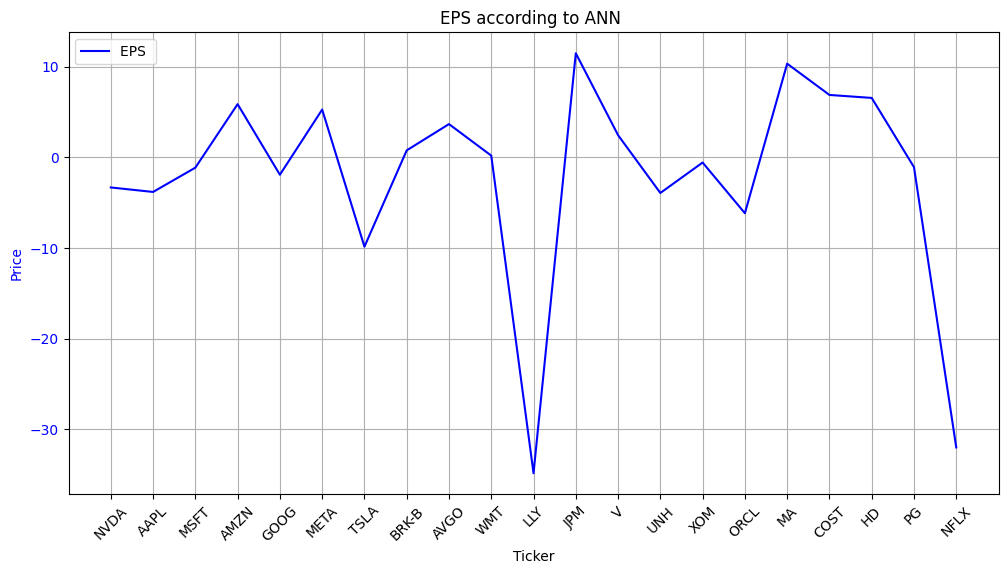

In [39]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Line plot for prices
# ax1.plot(analysis_df.index, analysis_df['PD_price'], label='Actual Price', color='blue')
# ax1.plot(analysis_df.index, analysis_df['ND_Predictions'], label='Predicted Price', color='green', linestyle='--')
ax1.plot(ANN_analysis.index, ANN_analysis['EPS'], label='EPS ', color='blue')
ax1.set_xlabel('Ticker')
ax1.set_ylabel('Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')
ax1.set_xticks(ANN_analysis.index)  # Set tick positions
ax1.set_xticklabels(ANN_analysis['ticker_id'], rotation=45)  # Optionally set tick labels with rotation




# # Bar plot for RMSE
# ax2 = ax1.twinx()
# bars = ax2.bar(analysis_df.index, analysis_df['RMSE'], alpha=0.3, label='RMSE', color='orange')
# ax2.set_ylabel('RMSE', color='orange')
# ax2.tick_params(axis='y', labelcolor='orange')
# ax2.legend(loc='upper right')

# # Add TickerID labels on top of bars
# for bar, ticker_id in zip(bars, analysis_df['ticker_id']):
#     ax2.text(
#         bar.get_x() + bar.get_width() / 2,  # X-coordinate (center of the bar)
#         bar.get_height(),                  # Y-coordinate (top of the bar)
#         ticker_id,                         # TickerID to display
#         ha='center', va='bottom', fontsize=9, rotation=45, color='black'
#     )

plt.title('EPS according to ANN ')
plt.grid()
plt.show()


In [32]:
analysis_df['ND_Predictions']

0     141.930263
1     230.336161
2     419.447780
3     200.049872
4     168.916708
5     571.154368
6     346.185548
7     471.216121
8     170.166202
9      89.540440
10    746.171100
11    245.249105
12    310.408944
13    586.223123
14    121.544716
15    190.571884
16    518.891309
17    957.218634
18    414.890780
19    174.663804
20    898.904545
Name: ND_Predictions, dtype: float64

In [33]:
Actual_Prices= pd.DataFrame()
ticker= []
price=[]
for i in ticker_lst:
    data = yf.download(i, start="2024-11-20", end="2024-11-21")
    ticker.append(i)

    actual_closing_price= float(data['Close'][i])
    price.append(actual_closing_price)

Actual_Prices['ticker']= ticker
Actual_Prices['price']= price


[*********************100%***********************]  1 of 1 completed
/var/folders/k1/k9yjwyjj6txbvvlybvf7xp1w0000gn/T/ipykernel_20917/1305974571.py:8: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  actual_closing_price= float(data['Close'][i])
[*********************100%***********************]  1 of 1 completed
/var/folders/k1/k9yjwyjj6txbvvlybvf7xp1w0000gn/T/ipykernel_20917/1305974571.py:8: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  actual_closing_price= float(data['Close'][i])
[*********************100%***********************]  1 of 1 completed
/var/folders/k1/k9yjwyjj6txbvvlybvf7xp1w0000gn/T/ipykernel_20917/1305974571.py:8: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  actual_closing_price

In [34]:
Actual_Prices

,ticker,price
0,NVDA,145.889999
1,AAPL,229.000000
2,MSFT,415.489990
3,AMZN,202.880005
4,GOOG,177.330002
5,META,565.520020
6,TSLA,342.029999
7,BRK-B,468.829987
8,AVGO,163.250000
9,WMT,87.180000


In [35]:
ANN_analysis['NextDayPrediction']

0     142.581741
1     225.196716
2     414.365234
3     208.760635
4     175.423828
5     570.804199
6     332.187744
7     469.612793
8     166.933319
9      87.383652
10    718.576782
11    252.278030
12    309.849976
13    596.582703
14    119.761169
15    184.600830
16    522.886475
17    934.977844
18    406.568542
19    169.823746
20    851.864563
Name: NextDayPrediction, dtype: float32